# Análisis de Dr. Scratch  

<p> Se ha de realizar un análisis previo y general sobre los datos obtenidos a partir de los distintos proyectos .sb3. Este primer acercamiento es necesario para saber con qué tipos de datos estamos tratando, cuáles son sus tipos, sus valores y si hay que hacer alguna modificación previa para poder extraer información a partir de ellos.</p> 
<p> Se indican a continuación cuáles son las puntuaciones que se consiguen en cada proyecto, para cada una de las 7 habilidades analizadas para el desarrollo del pensamiento computacional.</p>

Lo primero será importar las librerías necesarias y cargar los datos proporcionados en resultados.csv. Con ello obtenemos el siguiente dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df_analyzer = pd.read_csv("resultados.csv")
df_analyzer.head()

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,12002214_2019_11_27_14_26_43_941914.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
1,120039229_2019_12_24_06_12_25_867981.sb3,13,1.857143,Developing,1,2,3,1,1,2,3
2,1202324_2020_06_16_08_40_16_613045.sb3,14,2.000000,Developing,3,3,2,1,2,2,1
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.571429,Proficiency,3,3,3,1,3,2,3
4,120406791_2020_10_04_06_51_35_316448.sb3,5,0.714286,Basic,0,2,0,1,1,1,0


En el dataframe df_analyzer, se recogen las puntuaciones obtenidas para cada proyecto. Además del total y la media, podemos ver la puntuación específica para cada uno de los siete aspectos que reflejan el pensamiento computacional (CT). Se puntúan de 0 a 3. Para obtener información sobre el tipo de estas variables o columnas:

In [4]:
df_analyzer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Project             100 non-null    object 
 1   Total               100 non-null    int64  
 2   Average             100 non-null    float64
 3   Level               100 non-null    object 
 4   Abstraction         100 non-null    int64  
 5   Parallelization     100 non-null    int64  
 6   Logic               100 non-null    int64  
 7   Synchronization     100 non-null    int64  
 8   Flow Control        100 non-null    int64  
 9   UserInteractivity   100 non-null    int64  
 10  DataRepresentation  100 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 8.7+ KB


Es importante ver si todas las columnas tienen el tipo adecuado. Cada una de las variables del pensamiento computacional son enteros. Su suma da el total, que también es de tipo entero. La media obtenida para cada proyecto es de tipo float64. A partir de ahí, se obtiene cuál es el nivel para cada proyecto, que se agrupa en tres categorías en función de la puntuación total.
Además se observa que no hay ningún campo vacío en la tabla. Esto es importante a la hora de analizar los datos ya que no será necesario completar o estimar datos faltantes.

Si queremos que la columna "Level" sea una variable categórica, ya que existen tres niveles en que podemos clasificar las competencias del programador (bajo, medio y alto), se realiza lo siguiente:

In [5]:
df_analyzer["Level"] = pd.Categorical(df_analyzer["Level"])
df_analyzer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Project             100 non-null    object  
 1   Total               100 non-null    int64   
 2   Average             100 non-null    float64 
 3   Level               100 non-null    category
 4   Abstraction         100 non-null    int64   
 5   Parallelization     100 non-null    int64   
 6   Logic               100 non-null    int64   
 7   Synchronization     100 non-null    int64   
 8   Flow Control        100 non-null    int64   
 9   UserInteractivity   100 non-null    int64   
 10  DataRepresentation  100 non-null    int64   
dtypes: category(1), float64(1), int64(8), object(1)
memory usage: 8.2+ KB


Se puede representar la puntuación media solamente con dos decimales, gracias a la siguiente instrucción.

In [6]:
#pd.set_option("display.precision", 2)
pd.set_option('display.float_format', '{:.2f}'.format)

Ahora se trata de extraer más información del dataset. Consta de 100 filas o proyectos y 11 columnas, con los datos de interés.

In [7]:
df_analyzer.shape

(100, 11)

Otras formas de acceder a la información sobre las filas y las columnas, se presenta a continuación.

In [8]:
df_analyzer.index

RangeIndex(start=0, stop=100, step=1)

In [9]:
df_analyzer.axes[0] # Índice de filas

RangeIndex(start=0, stop=100, step=1)

In [10]:
df_analyzer.columns #También se puede usar df_analyzer.keys()

Index(['Project', 'Total', 'Average', 'Level', 'Abstraction',
       'Parallelization', 'Logic', 'Synchronization', 'Flow Control',
       'UserInteractivity', 'DataRepresentation'],
      dtype='object')

In [11]:
df_analyzer.axes[1] # Índice de columnas

Index(['Project', 'Total', 'Average', 'Level', 'Abstraction',
       'Parallelization', 'Logic', 'Synchronization', 'Flow Control',
       'UserInteractivity', 'DataRepresentation'],
      dtype='object')

Con todo esto se comprueba la estructura y tamaño de nuestro dataset, la información que contiene, de qué tipo son las distintas variables recogidas en sus columnas y si el dataset tiene todos los datos rellenos. Es el primer paso para realizar un buen análisis.

# Estadística descriptiva básica para las variables cuantitativas y cualitativas o categóricas.

Tras la exploración de los datos, obtenemos el resumen estadístico de los datos numéricos teniendo en cuenta los 100 proyectos analizados. La mayor puntuación media se obtiene para paralelismo y pensamiento lógico. La desviación estándar muestra valores elevados en cada área del pensamiento computacional (CT) para un conjunto de posibles valores de la variable o rango de 0 a 3, presentando su valor mayor de dispersión o desviación típica en representación de la información. En un 75% de las ocasiones los proyectos no superan los 15 puntos totales en cuanto a nivel computacional.

Es interesante ver cuáles son las dimensiones del pensamiento computacional con mayores y menores puntuaciones medias y su dispersión, si el objetivo es que los niños aumenten sus habilidades computacionales o si queremos que refuercen alguna en concreto. Otro objetivo sería disminuir la desviación típica, siempre y cuando consigan mejores puntuaciones en los proyectos, pero esto suele ser incompatible.

In [12]:
df_analyzer.describe()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,10.52,1.50,1.30,1.75,1.63,1.23,1.47,1.57,1.57
std,6.08,0.87,1.22,0.96,1.26,1.08,0.83,0.78,1.27
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.00,0.71,0.00,1.75,0.00,0.00,1.00,1.75,0.00
50%,13.00,1.86,1.00,2.00,2.00,1.00,2.00,2.00,2.00
75%,15.00,2.14,3.00,2.00,3.00,2.00,2.00,2.00,3.00
max,19.00,2.71,3.00,3.00,3.00,3.00,3.00,2.00,3.00


El resumen estadístico para las variables no numéricas nos indica de nuevo que hay 100 proyectos únicos en la muestra.

In [13]:
df_analyzer.describe(include=object)

,Project
count,100
unique,100
top,12115110_2020_11_07_05_55_33_092971.sb3
freq,1


<p> Los proyectos ordenados de mayor a menor puntuación total, y por lo tanto de mayor a menor puntuación media, son: </p>

In [14]:
df_analyzer.sort_values(by='Total', ascending = False)

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
45,123259467_2019_12_24_06_14_24_921337.sb3,19,2.71,Proficiency,3,3,3,2,3,2,3
43,123142330_2020_03_02_14_38_01_469193.sb3,18,2.57,Proficiency,3,3,2,3,2,2,3
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.57,Proficiency,3,3,3,1,3,2,3
37,12239450_2020_11_17_16_59_31_702345.sb3,17,2.43,Proficiency,3,2,3,2,2,2,3
35,1223_2020_02_03_15_09_27_783332.sb3,17,2.43,Proficiency,3,2,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
46,123259467_2020_03_29_22_08_17_838940.sb3,0,0.00,Basic,0,0,0,0,0,0,0
48,123355627_2019_11_19_14_22_42_147655.sb3,0,0.00,Basic,0,0,0,0,0,0,0
49,123355627_2019_11_19_14_22_52_525660.sb3,0,0.00,Basic,0,0,0,0,0,0,0
74,1234567890_2020_02_26_08_37_16_715808.sb3,0,0.00,Basic,0,0,0,0,0,0,0


El nº de proyectos con puntuación baja (Level: Basic), media (Level: Developing) y alta (Level: Profeciency) son:

In [15]:
df_analyzer["Level"].value_counts()

Proficiency    43
Basic          30
Developing     27
Name: Level, dtype: int64

In [16]:
df_analyzer["Level"].value_counts(normalize=True)

Proficiency   0.43
Basic         0.30
Developing    0.27
Name: Level, dtype: float64

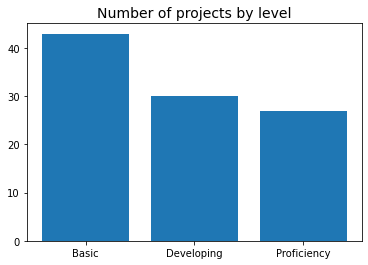

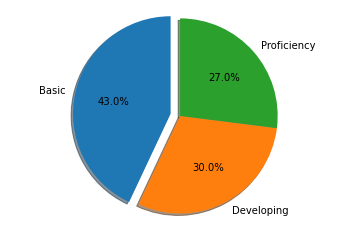

In [17]:
values = df_analyzer["Level"].value_counts()
names = df_analyzer.Level.unique()
plt.bar(names, values)
plt.title("Number of projects by level", fontsize=14)

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Así se obtienen el gráfico de distribución por nivel del programador y su diagrama de sectores correspondiente. Dentro de la muestra de 100 proyectos considerados, el nivel básico es el más frecuente. Según avanza el nivel el nº de proyectos que lo consiguen disminuye.

Hay demasiados proyectos en la categoría de nivel básico o bajo. Sería conveniente reforzar las habilidades de los programadores de los proyectos para que esta categoría disminuya su frecuencia y encontremos mayor cantidad de proyectos con nivel alto o profesional.

Se muestra a continuación una forma de filtrar por nivel para luego poder visualizar la puntuación de los proyectos de cada nivel, así como el mínimo y el máximo de cada nivel, en el dataset analizado.
- **Para nivel bajo o básico:**

In [18]:
filt_basic = df_analyzer['Level'].str.contains('Basic', na=False)
df_analyzer_basic = df_analyzer.loc[filt_basic].sort_values(by="Total")

In [19]:
print(df_analyzer["Total"].loc[filt_basic].min())
print(df_analyzer["Total"].loc[filt_basic].max())

0
7


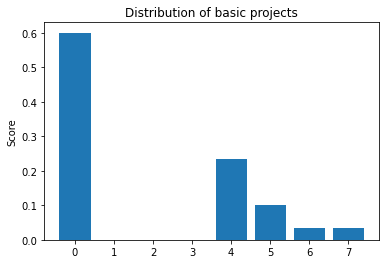

In [20]:
values = df_analyzer_basic["Total"].value_counts(normalize=True)
names = df_analyzer_basic.Total.unique()
plt.bar(names, values)
plt.title("Distribution of basic projects")
plt.ylabel("Score")
plt.show()

Se representa en esta ocasión como se distribuyen los proyectos clasificados con nivel básico en función de la puntuación obtenida. La distribución presenta una alta concentración de proyectos con valor = 0. El nº total de proyectos que tienen un valor de 0 es:

In [21]:
sum(df_analyzer.Total==0)

18

Que de una muestra de 100 proyectos 18 tengan una puntuación total de 0, llama mucho la atención. Sería interesante analizar por qué en esos proyectos no se ha conseguido ni un punto.

 - **Para nivel medio o desarrollador:**

In [22]:
filt_dev = df_analyzer['Level'].str.contains('Developing', na=False)
df_analyzer_dev = df_analyzer.loc[filt_dev].sort_values(by="Total")

In [23]:
# Valores mínimo y máximo alcanzados por los proyectos en nivel medio.
print(df_analyzer["Total"].loc[filt_dev].min())
print(df_analyzer["Total"].loc[filt_dev].max())

9
14


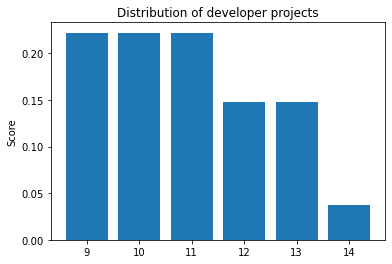

In [24]:
values = df_analyzer_dev["Total"].value_counts(normalize=True)
names = df_analyzer_dev.Total.unique()
plt.bar(names, values)
plt.title("Distribution of developer projects")
plt.ylabel("Score")
plt.show()

Se presenta en está gráfica la distribución de los proyectos clasificados en nivel medio o de desarrollador, en función de la puntuación obtenida en cada uno de los proyectos. Sólo se reflejan las puntuaciones que se consiguen por algún proyecto. Las puntuaciones 9, 10 y 11 son las más frecuentes. El mismo nº de proyectos consiguen 12 y 13 puntos. Dichas puntuaciones consiguen distribuciones más uniformes. Pero apenas un 5% alcanzan los 14 puntos.

En el nivel medio o desarrollador las puntuaciones están más repartidas.

- **Para nivel alto o profesional:**

In [25]:
filt_prof = df_analyzer['Level'].str.contains('Proficiency', na=False)
df_prof=df_analyzer.loc[filt_prof].sort_values(by="Total")

In [26]:
# Valores mínimo y máximo alcanzados por los proyectos en nivel alto.
print(df_analyzer["Total"].loc[filt_prof].min())
print(df_analyzer["Total"].loc[filt_prof].max())

15
19


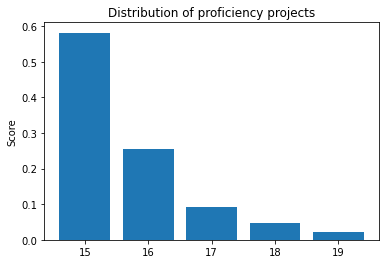

In [27]:
values = df_prof["Total"].value_counts(normalize=True)
names = df_prof.Total.unique()
plt.bar(names, values) #barh
plt.title("Distribution of proficiency projects")
plt.ylabel("Score")
plt.show()

Por útimo se observa la distribución según la puntuación conseguida para los proyectos de nivel alto o profesional. Más de la mitad de los proyectos de este nivel tienen 15 puntos. Esta puntuación disminuye exponencialmente. Ningún proyecto analizado consigue las máximas puntuaciones de 20 y 21. 

In [28]:
level_statistics = df_analyzer.groupby('Level')["Total"].agg([np.mean,np.median, np.var, np.std])
level_statistics

,mean,median,var,std
Level,,,,
Basic,2.00,0,6.48,2.55
Developing,11.78,12,2.56,1.60
Proficiency,15.67,15,0.99,0.99


<p> Se obtienen las medidas de centralización y dispersión por nivel.</p>
<li>
    <ul> En nivel "Basic": la media se sitúa en 2, si bien, con la mediana se observa que al menos el 50% de estos proyectos tienen una puntuación total de 0. Existen proyectos con elevadas puntuaciones dentro de este rango que elevan la media. La varianza y la desviación típica reflejan esa dispersión en torno a la media. </ul>
    <ul>Tanto en el nivel "Developing" como en "Proficiency": el promedio y la mediana tienen valores similares, y por ello, como se comprueba en la tabla, sus medidas de dispersión no alcanzan valores demasiado elevados.</ul>
    <ul> Sí es necesario remarcar que en "Proficiency", la puntuación obtenida se concentra en torno al valor más bajo del rango que determina el nivel del programador (15 puntos). Los que han alcanzado este nivel deberían ser capaces de obtener mayores puntuaciones.</ul>
</li>

Si se quiere visualizar los proyectos que cuentan con un paralelismo = 3 se realiza lo que viene a continuación. Del mismo modo se podría hacer para cada CT y puntuación.

In [29]:
df = df_analyzer.groupby(["Parallelization"])
df.get_group(3)

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
2,1202324_2020_06_16_08_40_16_613045.sb3,14,2.00,Developing,3,3,2,1,2,2,1
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.57,Proficiency,3,3,3,1,3,2,3
8,1208699_2020_05_19_01_18_19_238119.sb3,17,2.43,Proficiency,3,3,3,1,3,2,2
21,121658969_2021_05_25_17_42_00_468328.sb3,16,2.29,Proficiency,3,3,2,1,2,2,3
22,121658969_2021_05_25_21_26_56_760288.sb3,16,2.29,Proficiency,3,3,2,1,2,2,3
40,122770615_2020_02_13_08_46_31_801452.sb3,14,2.00,Developing,2,3,3,1,2,2,1
41,122770615_2020_02_20_01_32_33_815862.sb3,14,2.00,Developing,2,3,3,1,2,2,1
42,122770615_2020_02_20_15_11_56_406221.sb3,14,2.00,Developing,2,3,3,1,2,2,1
43,123142330_2020_03_02_14_38_01_469193.sb3,18,2.57,Proficiency,3,3,2,3,2,2,3
45,123259467_2019_12_24_06_14_24_921337.sb3,19,2.71,Proficiency,3,3,3,2,3,2,3


Para filtrar haciendo que cada CT cumpla determinadas condiciones se procede:

In [30]:
((df_analyzer["Logic"]>2)&(df_analyzer["Parallelization"]<=2))

0     False
1      True
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

Para ver la puntuación obtenida para cada CT (en este caso abstracción) y obtener su distribución se realiza lo siguiente.

In [31]:
df_analyzer["Abstraction"].value_counts(ascending=False) 

0    35
1    28
3    28
2     9
Name: Abstraction, dtype: int64

array([[<AxesSubplot:title={'center':'Abstraction'}>]], dtype=object)

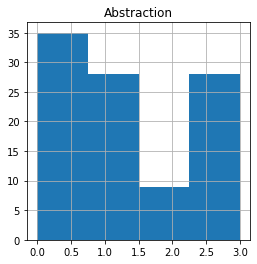

In [32]:
df_analyzer.hist(bins=4,column="Abstraction",figsize=(4,4))

Para visualizar cuántos proyectos consiguen 0, 1, 2 o 3 puntos en pensamiento lógico:

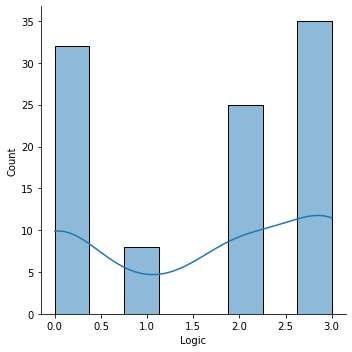

In [33]:
sns.displot(df_analyzer["Logic"],kde=True)

<AxesSubplot:ylabel='Count'>

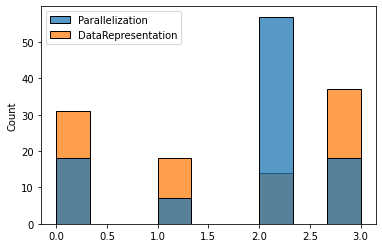

In [34]:
sns.histplot(df_analyzer[["Parallelization", "DataRepresentation"]])

En la figura se representan las distribuciones de paralelismo (CT con mayor media) y representación de la información (CT con mayor dispersión) con respecto a los puntos obtenidos. En paralelismo muchos proyectos consiguen los 2 puntos. De esta manera, podemos comparar los valores sobre la misma gráfica.
Es una forma de visualizar de manera conjunta las similitudes y diferencias de cada par de dimensiones del CT.

In [35]:
df_analyzer.select_dtypes(include=np.number)

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0.00,0,0,0,0,0,0,0
1,13,1.86,1,2,3,1,1,2,3
2,14,2.00,3,3,2,1,2,2,1
3,18,2.57,3,3,3,1,3,2,3
4,5,0.71,0,2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
95,5,0.71,0,1,0,0,2,2,0
96,5,0.71,0,1,0,0,2,2,0
97,6,0.86,0,1,0,1,2,2,0
98,5,0.71,0,1,0,0,2,2,0


Para seleccionar las 7 habilidades del pensamiento computacional (CT):

In [36]:
df_ct = df_analyzer.loc[:, "Abstraction":"DataRepresentation"]
df_ct

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0,0,0,0,0,0
1,1,2,3,1,1,2,3
2,3,3,2,1,2,2,1
3,3,3,3,1,3,2,3
4,0,2,0,1,1,1,0
...,...,...,...,...,...,...,...
95,0,1,0,0,2,2,0
96,0,1,0,0,2,2,0
97,0,1,0,1,2,2,0
98,0,1,0,0,2,2,0


Con ello visualizamos solo las variables numéricas del dataframe de cada dimensión, para poder analizarlas por separado más adelante. A continuación se analiza cómo se distribuye la puntuación para cada CT.

In [37]:
df_ct = df_analyzer.loc[:, "Abstraction":"DataRepresentation"]
for column in df_ct: 
    print(df_analyzer.value_counts(column))

Abstraction
0    35
1    28
3    28
2     9
dtype: int64
Parallelization
2    57
0    18
3    18
1     7
dtype: int64
Logic
3    35
0    32
2    25
1     8
dtype: int64
Synchronization
1    48
0    26
3    23
2     3
dtype: int64
Flow Control
2    57
1    21
0    18
3     4
dtype: int64
UserInteractivity
2    75
0    18
1     7
dtype: int64
DataRepresentation
3    37
0    31
1    18
2    14
dtype: int64


Así podemos ver las puntuaciones para cada aspecto del pensamiento computacional. Se presentan a continuación de manera gráfica.

<AxesSubplot:xlabel='DataRepresentation', ylabel='Count'>

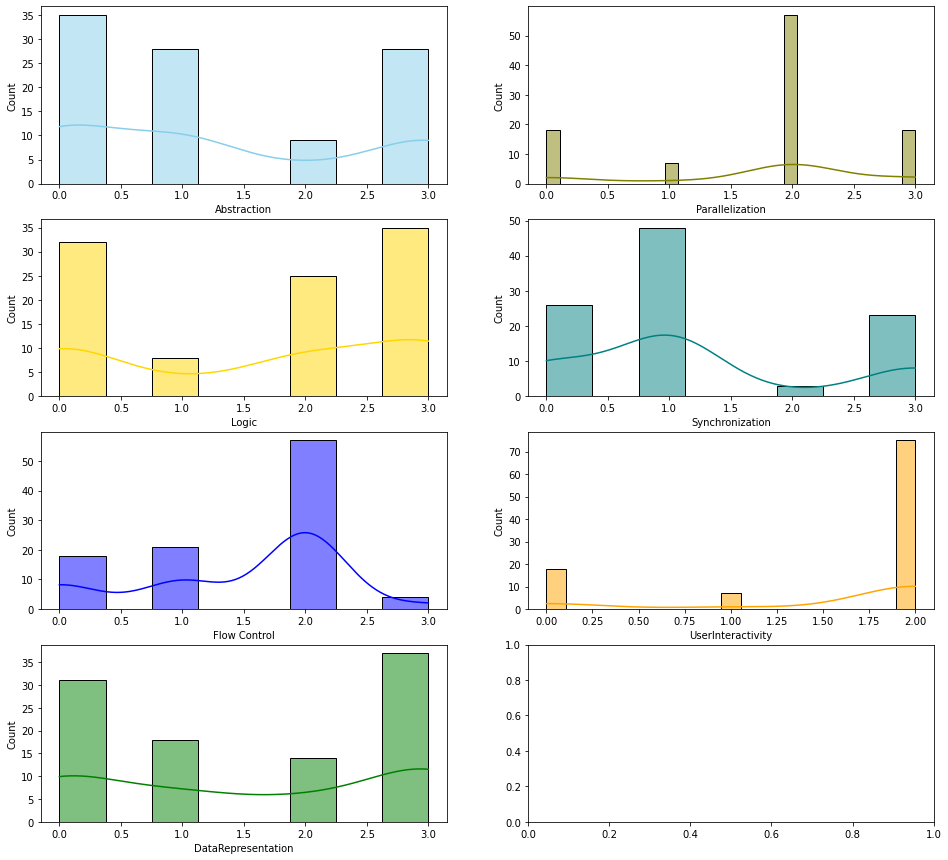

In [38]:
fig, axs = plt.subplots(4, 2, figsize=(16, 15))
sns.histplot(data=df_analyzer, x="Abstraction", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_analyzer, x="Parallelization", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_analyzer, x="Logic", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_analyzer, x="Synchronization", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_analyzer, x="Flow Control", kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df_analyzer, x="UserInteractivity", kde=True, color="orange", ax=axs[2, 1])
sns.histplot(data=df_analyzer, x="DataRepresentation", kde=True, color="green", ax=axs[3, 0])
#sns.histplot(data=df_analyzer, x="Average", kde=True, color="red", ax=axs[3, 1])

Ésta es la representación gráfica donde se ve cuántos proyectos consiguen una determinada puntuación en cada área del pensamiento computacional. Se observan grandes diferencias entre sus distribuciones, pero se puede deducir cuales son las dimensiones del pensamiento computacional en las que hay que conseguir puntuaciones más elevadas.     

# Análisis estadístico

A continuación se procede a realizar una revisión de los estadísticos principales. Calculamos la media y la mediana como medidas de centralización.

In [39]:
#Tendencia central
df_analyzer.mean()

Total                10.52
Average               1.50
Abstraction           1.30
Parallelization       1.75
Logic                 1.63
Synchronization       1.23
Flow Control          1.47
UserInteractivity     1.57
DataRepresentation    1.57
dtype: float64

Los mayores promedios se consiguen en pensamiento lógico y paralelismo, aportando mayor peso que el resto al valor medio total.

In [40]:
#Tendencia central
df_analyzer.median()

Total                13.00
Average               1.86
Abstraction           1.00
Parallelization       2.00
Logic                 2.00
Synchronization       1.00
Flow Control          2.00
UserInteractivity     2.00
DataRepresentation    2.00
dtype: float64

A partir de la mediana destaca el hecho de que la mitad de los proyectos sólo tienen un valor de 0 o 1  en abstracción y en sincronización. Coincide con el segundo cuartil y el percentil 50%. Para el resto de habilidades en cuanto a pensamiento computacional la mediana se sitúa en 2 puntos. Es una medida central más representativa que la media cuando las puntuaciones presentan desviaciones elevadas en torno a la media (como ocurre en este caso de estudio).

In [41]:
# Percentil: Valor que no se supera en un 50% de los proyectos
df_analyzer.quantile(0.5)

Total                13.00
Average               1.86
Abstraction           1.00
Parallelization       2.00
Logic                 2.00
Synchronization       1.00
Flow Control          2.00
UserInteractivity     2.00
DataRepresentation    2.00
Name: 0.5, dtype: float64

In [42]:
# Percentil: Valor que no se supera en un 60% de los proyectos
df_analyzer.quantile(0.6)

Total                15.00
Average               2.14
Abstraction           1.00
Parallelization       2.00
Logic                 2.00
Synchronization       1.00
Flow Control          2.00
UserInteractivity     2.00
DataRepresentation    2.00
Name: 0.6, dtype: float64

Representamos a continuación el diagrama de cajas. El rango intercuartílico es muy estrecho en la interactividad con el usuario y en paralelismo. El primer cuartil está en 1.75 y el tercer cuartil prácticamente coincide con la mediana en los 2 puntos conseguidos por los proyectos. Las puntuaciones 0, 1, y 3 son consideradas como datos atípicos. La puntuación de 3 en interactividad co el usuario ni siquiera aparece, pues ningún proyecto consigue esta puntuación en los 100 proyectos considerados. 

Tanto en pensamiento lógico como en representación de la información los rangos entre el primer cuartil (en 0 puntos) y el tercer cuartil (en 3 puntos) son similares y la mediana se sitúa en los 2 puntos.

En abstracción la mediana se encuentra en 1 punto, dejando arriba y abajo el mismo nº de proyectos. La diferencia entre el tercer y el primer cuartil, se corresponde con todo el rango de valores posibles, de modo que el 75% de los proyectos ha alcanzado los tres puntos en esta habilidad.

En sincronización la puntuación que deja a derechas e izquierdas el 50% de puntuaciones de los proyectos o mediana está también en un punto. El primer cuartil está en un punto y el tercer cuartil está en 2 puntos asignados a los proyectos.

El rango intercuatílico es más estrecho para el control de flujo del programa. La mediana coincide con el tercer cuartil en 2 puntos. El 25% de los proyectos tienen una puntuación de 1 punto.

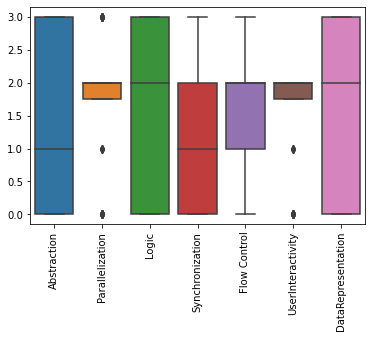

In [43]:
sns.boxplot(data=df_ct)
plt.xticks(rotation=90);

In [44]:
df_analyzer.var()

Total                36.96
Average               0.75
Abstraction           1.48
Parallelization       0.92
Logic                 1.59
Synchronization       1.17
Flow Control          0.70
UserInteractivity     0.61
DataRepresentation    1.62
dtype: float64

In [45]:
df_analyzer.std()

Total                6.08
Average              0.87
Abstraction          1.22
Parallelization      0.96
Logic                1.26
Synchronization      1.08
Flow Control         0.83
UserInteractivity    0.78
DataRepresentation   1.27
dtype: float64

Al calcular la varianza y la desviación típica, vemos que la dispersión en torno a la media de cada habilidad del CT es bastante elevada para los valores de puntuación posibles (0,1,2,3). La interactividad con el usuario y el flujo de control del programa analizados en los proyectos presentan valores más concentrados en torno a la media.

Se puede profundizar aún más, obteniendo media y varianza para cada área del pensamiento computacional, en función además del nivel del programador.

In [76]:
agg = df_analyzer.loc[:, "Level":"DataRepresentation"].groupby('Level').agg([np.mean, np.std])
agg

Abstraction      Parallelization      Logic      Synchronization  \
                   mean  std            mean  std  mean  std            mean   
Level                                                                          
Basic              0.00 0.00            0.60 0.81  0.00 0.00            0.13   
Developing         1.19 0.83            2.15 0.36  2.04 1.02            1.30   
Proficiency        2.28 0.93            2.30 0.51  2.51 0.55            1.95   

                 Flow Control      UserInteractivity      DataRepresentation  \
             std         mean  std              mean  std               mean   
Level                                                                          
Basic       0.35         0.60 0.81              0.63 0.85               0.03   
Developing  0.72         1.59 0.50              1.93 0.27               1.59   
Proficiency 0.97         2.00 0.44              2.00 0.00               2.63   

                  
             std  
Level             
Basic       0.18  
Developing  0.97  
Proficiency 0.62

Siendo tan exhaustivos, se percibe que: 
- En el nivel básico se consigue mayor media y mayor varianza en paralelismo, en interactividad con el usuario y en control del flujo del programa. Por ello, en nivel básico éstas son las habilidades que destacan. En el resto de dimensiones, salvo en sincronismo, los valores son nulos.
- En el nivel medio o desarrollador interactividad con el usuario, control del flujo del programa y paralelismo aumentan su media con una dispersión muy baja. Paralelismo y lógica aumenta su media drásticamente desde el nivel anterior. Por lo tanto paralelismo, lógica e interactividad con el usuario serían las habilidades a destacar en este nivel, fijando el foco de atención sobre la media.
- En el nivel alto o profesional, las capacidades más desarrolladas en los proyectos analizados son: lógica y representación de la información, aunque en ninguna de las dimensiones la media baja de 2.

(Recordar que ningún proyecto del miniset obtiene tres puntos en interactividad con el usuario).

 Para comparar dos distribuciones diferentes de la misma muestra se emplea el coeficiente de variación de Pearson.
 Cuando el coeficiente de variación supera el 30% (0,3) se dice que la media es poco representativa, que es lo que ocurre en nuestro caso de estudio.

In [47]:
cv = df_analyzer.std()/df_analyzer.mean()
cv

Total                0.58
Average              0.58
Abstraction          0.94
Parallelization      0.55
Logic                0.77
Synchronization      0.88
Flow Control         0.57
UserInteractivity    0.50
DataRepresentation   0.81
dtype: float64

A continuación se busca si existe relación y dependencia entre cada par de variables que representan cada área del CT. Para ello se calculan covarianza y correlación.

In [48]:
df_ct.cov()

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.48,0.79,1.07,0.44,0.62,0.54,0.88
Parallelization,0.79,0.92,0.86,0.55,0.63,0.62,0.72
Logic,1.07,0.86,1.59,0.63,0.62,0.67,1.23
Synchronization,0.44,0.55,0.63,1.17,0.50,0.45,0.90
Flow Control,0.62,0.63,0.62,0.50,0.70,0.57,0.53
UserInteractivity,0.54,0.62,0.67,0.45,0.57,0.61,0.62
DataRepresentation,0.88,0.72,1.23,0.90,0.53,0.62,1.62


<AxesSubplot:>

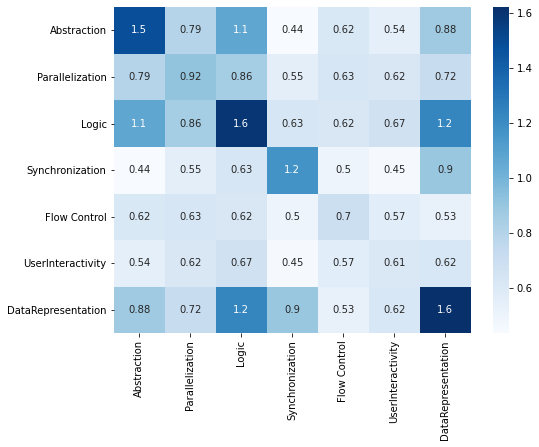

In [49]:
plt.figure(figsize=(8,6))
cov_matrix= df_ct.cov()
sns.heatmap(cov_matrix, annot= True, cmap='Blues')

Las covarianzas obtenidas entre cada par de variables del pensamiento computacional son positivas, pero muy cercanas a 0. Así que según aumenta cada CT aumenta también la otra variable CT considerada. Pero al ser tan cercanos los valores a 0, podría decirse que no existe dependencia lineal entre cada par de variables.

In [50]:
# Correlación de cada CT con la puntuación total.
df_analyzer.corrwith(df_analyzer["Total"])

Total                1.00
Average              1.00
Abstraction          0.79
Parallelization      0.87
Logic                0.87
Synchronization      0.71
Flow Control         0.82
UserInteractivity    0.86
DataRepresentation   0.84
dtype: float64

Se calcula la matriz con los coeficientes de correlación, para profundizar un poco más en la relación lineal entre cada par de variables.

In [51]:
df_ct.corr()

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.00,0.68,0.70,0.33,0.61,0.57,0.57
Parallelization,0.68,1.00,0.71,0.53,0.79,0.83,0.59
Logic,0.70,0.71,1.00,0.46,0.59,0.68,0.77
Synchronization,0.33,0.53,0.46,1.00,0.55,0.54,0.65
Flow Control,0.61,0.79,0.59,0.55,1.00,0.87,0.50
UserInteractivity,0.57,0.83,0.68,0.54,0.87,1.00,0.62
DataRepresentation,0.57,0.59,0.77,0.65,0.50,0.62,1.00


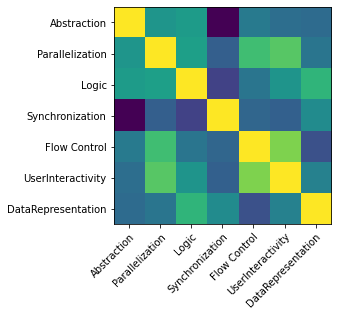

In [52]:
corr_matrix=df_ct.corr().values
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
ct = df_ct.columns

ax.set_xticks(np.arange(len(ct)))
ax.set_yticks(np.arange(len(ct)))

ax.set_xticklabels(ct)
ax.set_yticklabels(ct)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

<AxesSubplot:>

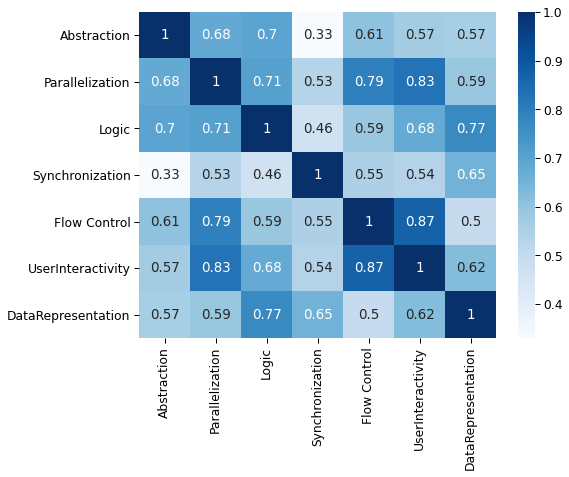

In [53]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corr_matrix= df_ct.corr()
sns.heatmap(corr_matrix, annot= True, cmap='Blues')

Tras calcular y representar la matriz de correlación, observamos algunos valores elevados, incluso próximos a uno. 
Esto contradice el hecho de que no exista relación lineal fuerte positiva. Tales son los casos de las relaciones entre interactividad con el usuario y paralelismo o control de flujo del programa e interactividad con el usuario.
Por el contrario también se aprecia una relación lineal débil positiva (0.33) entre sincronización y abstracción. 
A continuación se observan los casos mencionados con más detalle.

Para cada par de habilidades de CT, obtenemos las nubes de puntos.

Text(0, 0.5, 'Flow Control')

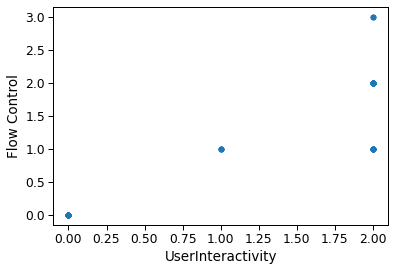

In [54]:
plt.scatter(df_analyzer['UserInteractivity'], df_analyzer['Flow Control'])
plt.xlabel('UserInteractivity')
plt.ylabel('Flow Control')

Diagrama de dispersión donde se busca la relación entre el flujo de control y la interactividad con el usuario del programa.

Text(0, 0.5, 'Parallelization')

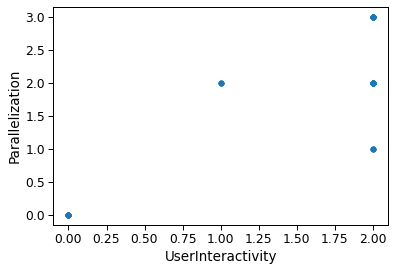

In [55]:
plt.scatter(df_analyzer['UserInteractivity'], df_analyzer['Parallelization'])
plt.xlabel('UserInteractivity')
plt.ylabel('Parallelization')

Diagrama de dispersión donde se busca la relación existente entre el paralelismo y la interactividad con el usuario del programa.

Text(0, 0.5, 'Abstraction')

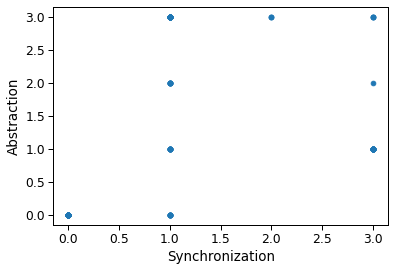

In [56]:
plt.scatter(df_analyzer['Synchronization'], df_analyzer['Abstraction'])
plt.xlabel('Synchronization')
plt.ylabel('Abstraction')

Diagrama de dispersión para hallar posibles relaciones entre abstracción y sincronización.

Se muestra a continuación un cuadro resumen que representa las distribuciones de cada variable en la diagonal principal y la relación existente entre cada par de variables. Si nos fijamos en la relación entre cada par de variables del pensamiento computacional, se obtiene una nube de puntos que no aparenta ningún tipo de agrupación o relación.

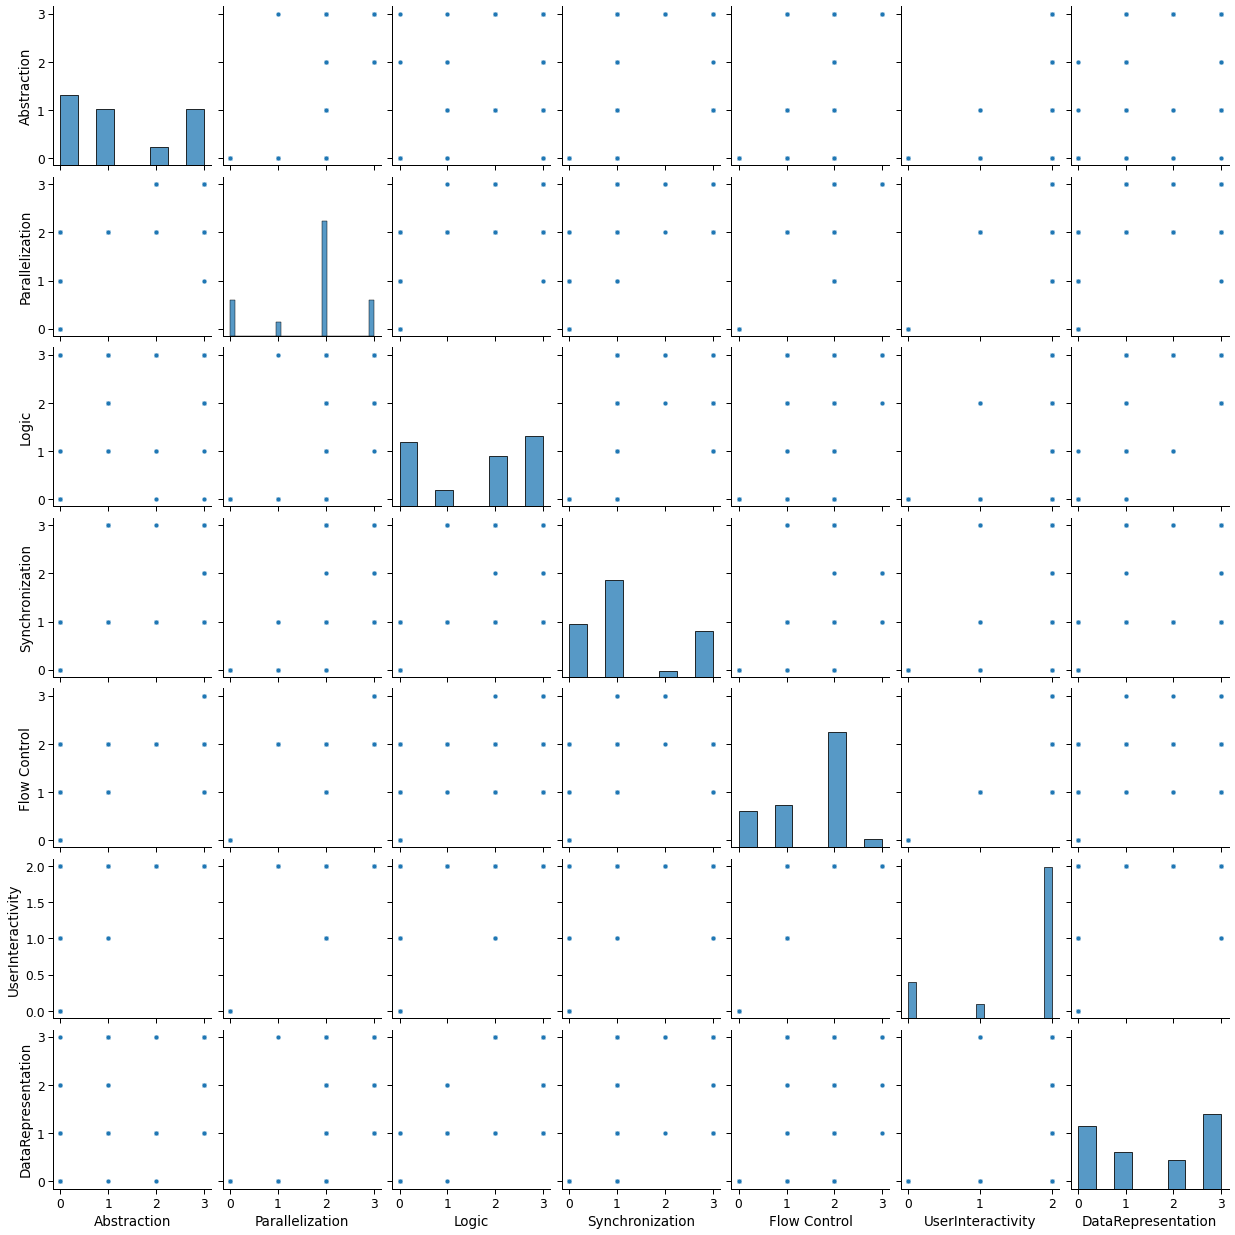

In [57]:
sns.pairplot(df_ct)

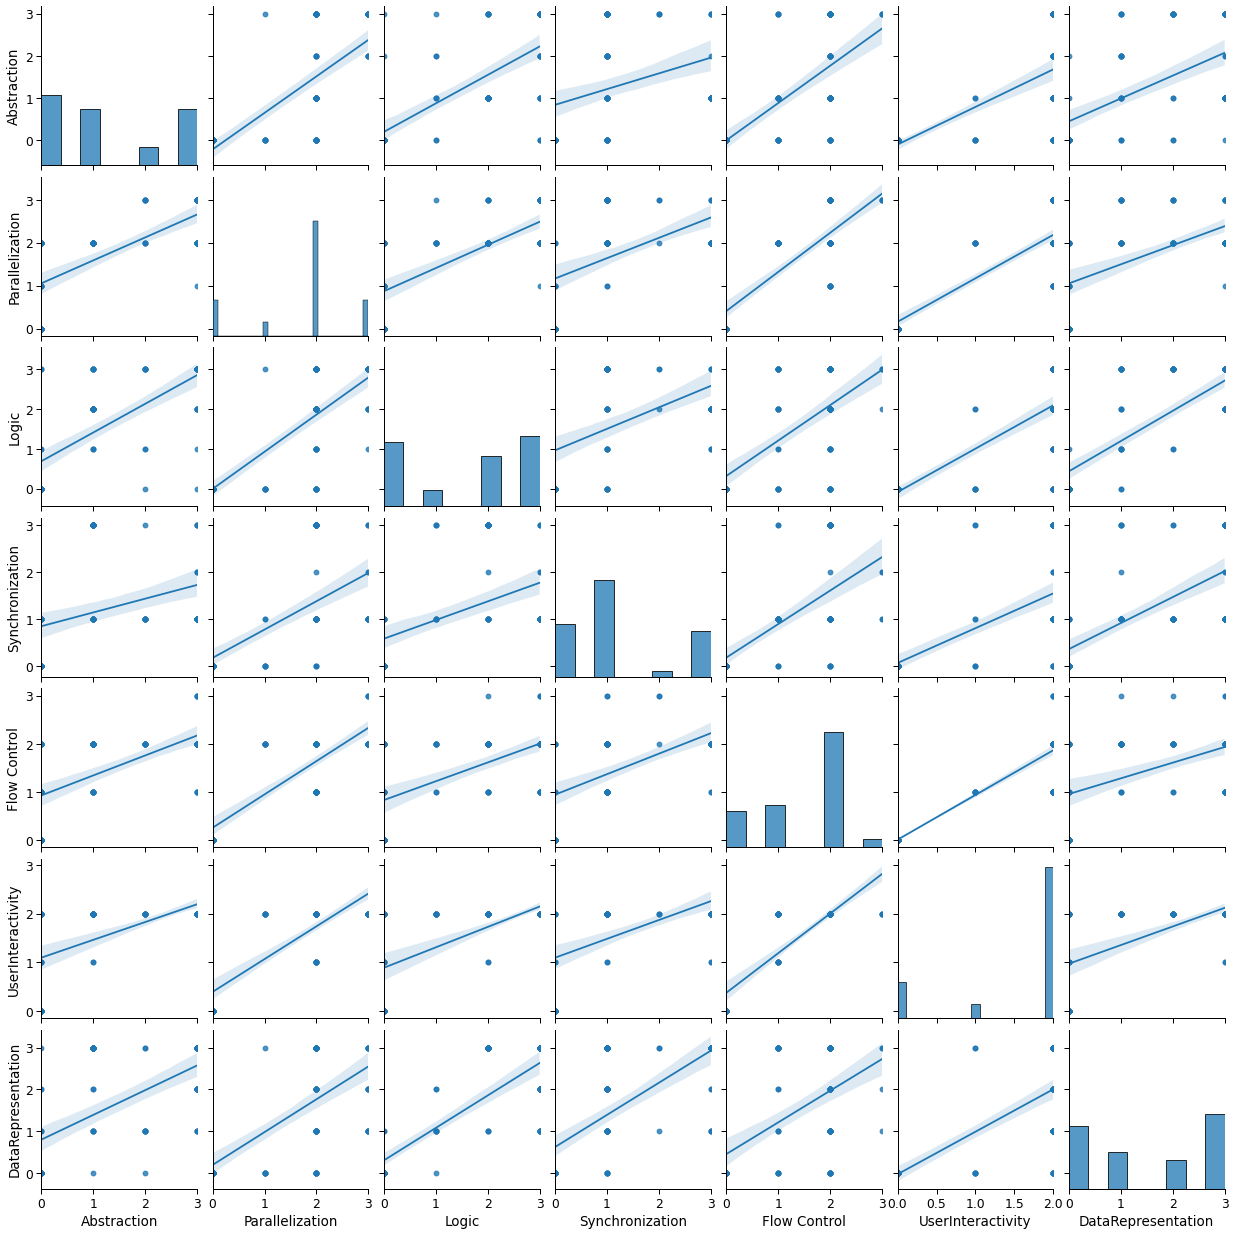

In [58]:
sns.pairplot(df_ct, kind="reg")

Cuando se trata de modelar y realizar una estimación lineal a partir de cada par de variables CT, no se consigue. Los valores obtenidos en los diagramas de dispersión, no guardan relación aparente, como se puede apreciar en el cuadro superior.

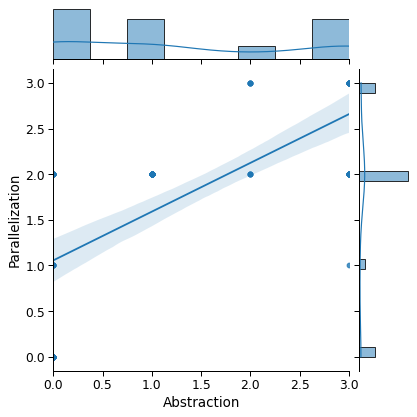

In [59]:
sns.jointplot(x='Abstraction', y='Parallelization', data=df_analyzer, kind='reg');

A partir de la representación del diagrama de dispersión entre dos CT, obtenemos una representación de puntos que reparte sus valores entre 0 y 3 puntos, sin una relación que se observe a simple vista, aunque según la matriz de correlación **sí exista dependencia.** 

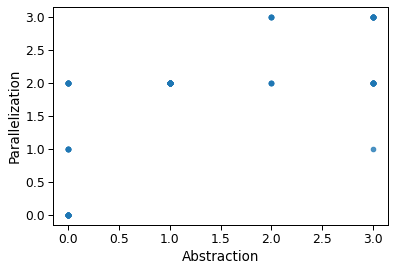

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df_analyzer.Abstraction, y=df_analyzer.Parallelization, alpha= 0.8)
ax.set_xlabel('Abstraction')
ax.set_ylabel('Parallelization');

In [61]:
df = df_analyzer.select_dtypes(include=np.number).cumsum()
df

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0.00,0,0,0,0,0,0,0
1,13,1.86,1,2,3,1,1,2,3
2,27,3.86,4,5,5,2,3,4,4
3,45,6.43,7,8,8,3,6,6,7
4,50,7.14,7,10,8,4,7,7,7
...,...,...,...,...,...,...,...,...,...
95,1031,147.29,130,171,163,122,139,149,157
96,1036,148.00,130,172,163,122,141,151,157
97,1042,148.86,130,173,163,123,143,153,157
98,1047,149.57,130,174,163,123,145,155,157


<AxesSubplot:>

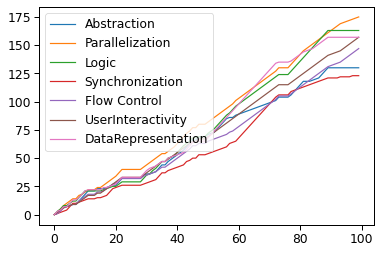

In [62]:
df_plot_cumsum = df.loc[:, "Abstraction":"DataRepresentation"]
df_plot_cumsum.plot()

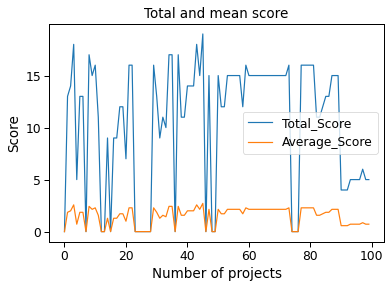

In [63]:
plt.plot(df_analyzer.index, df_analyzer.Total,label="Total_Score")
plt.plot(df_analyzer.index, df_analyzer.Average, label="Average_Score")
plt.xlabel("Number of projects")
plt.ylabel("Score")
plt.title("Total and mean score")
plt.legend()
plt.show()

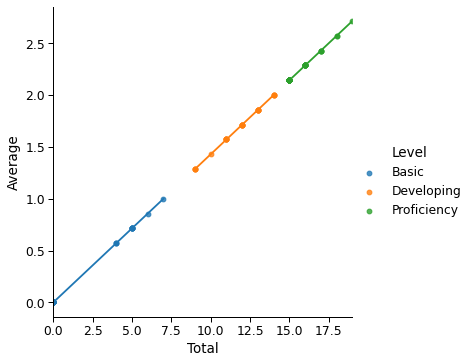

In [67]:
sns.lmplot(data=df_analyzer, x="Total", y="Average", hue="Level")

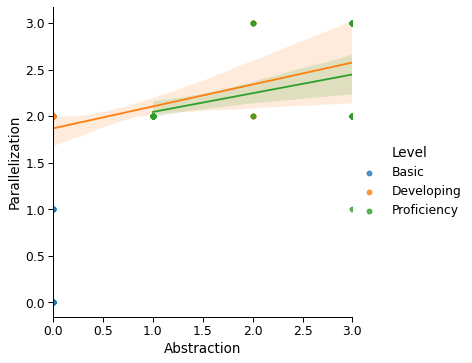

In [69]:
sns.lmplot(data=df_analyzer, x='Abstraction', y='Parallelization', hue ="Level")